In [19]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent))
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from utils.she_qoi import analytic_fourier_mode_var
analytic_fourier_mode_var(1)

np.float64(0.10059249350810782)

In [12]:
from mlmc.stoch_heat_eqn_fe_corr_check import stoch_heat_eqn_l
from utils.she_qoi import nth_fourier_mode

squared_amplitude = lambda u: nth_fourier_mode(1, u)**2
level = 5
stoch_heat_eqn_l(l=level, N=10000, qoi_fn=squared_amplitude, log_dir=f'data')

(array([-3.27014336e-01,  2.67925207e-04, -6.86532626e-08,  6.88780143e-11]),
 array([992.9344791 , 288.10166945]))

In [ ]:
dfs = {}
for fn in glob.glob("data/level_*.csv"):
    level = int(re.search(r"level_(\d+)\.csv", fn).group(1))
    dfs[level] = pd.read_csv(fn)

corrs = {}
for level, df in dfs.items():
    Pf, Pc = df["Pf"].values, df["Pc"].values
    if np.allclose(Pc, 0):  # l=0, no coarse
        continue
    corrs[level] = np.corrcoef(Pf, Pc)[0,1]


{1: np.float64(0.9554655163708363),
 3: np.float64(0.9998417888089358),
 2: np.float64(0.997314615137283),
 5: np.float64(0.999999373570683),
 4: np.float64(0.9999908189735898)}

Estimated decay exponent k ≈ 4.04


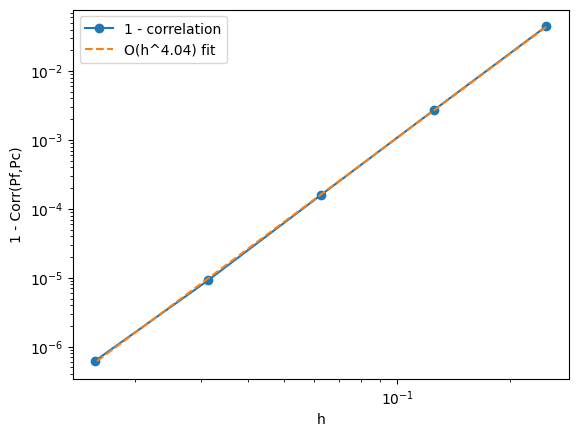

In [ ]:
levels = np.array(sorted(corrs.keys()))
hs = 1.0 / (2**(levels+1))        # h = 1/nf, nf=2^(l+1)
rho = np.array([corrs[l] for l in levels])

y = np.log(1 - rho)
x = np.log(hs)
coeffs = np.polyfit(x, y, 1)
k_est = coeffs[0]

print(f"Estimated decay exponent k ≈ {k_est:.2f}")

plt.figure()
plt.loglog(hs, 1-rho, 'o-', label="1 - correlation")
plt.loglog(hs, np.exp(coeffs[1])*hs**k_est, '--', label=f"O(h^{k_est:.2f}) fit")
plt.xlabel("h")
plt.ylabel("1 - Corr(Pf,Pc)")
plt.legend()
plt.show()